In [27]:
import pickle

with open('lego-test.pickle', 'rb') as file:
    train_data = pickle.load(file)


labels = [label for (_, label) in train_data]

num_classes = len(set(labels))

print(f"Количество классов: {num_classes}")


Количество классов: 10


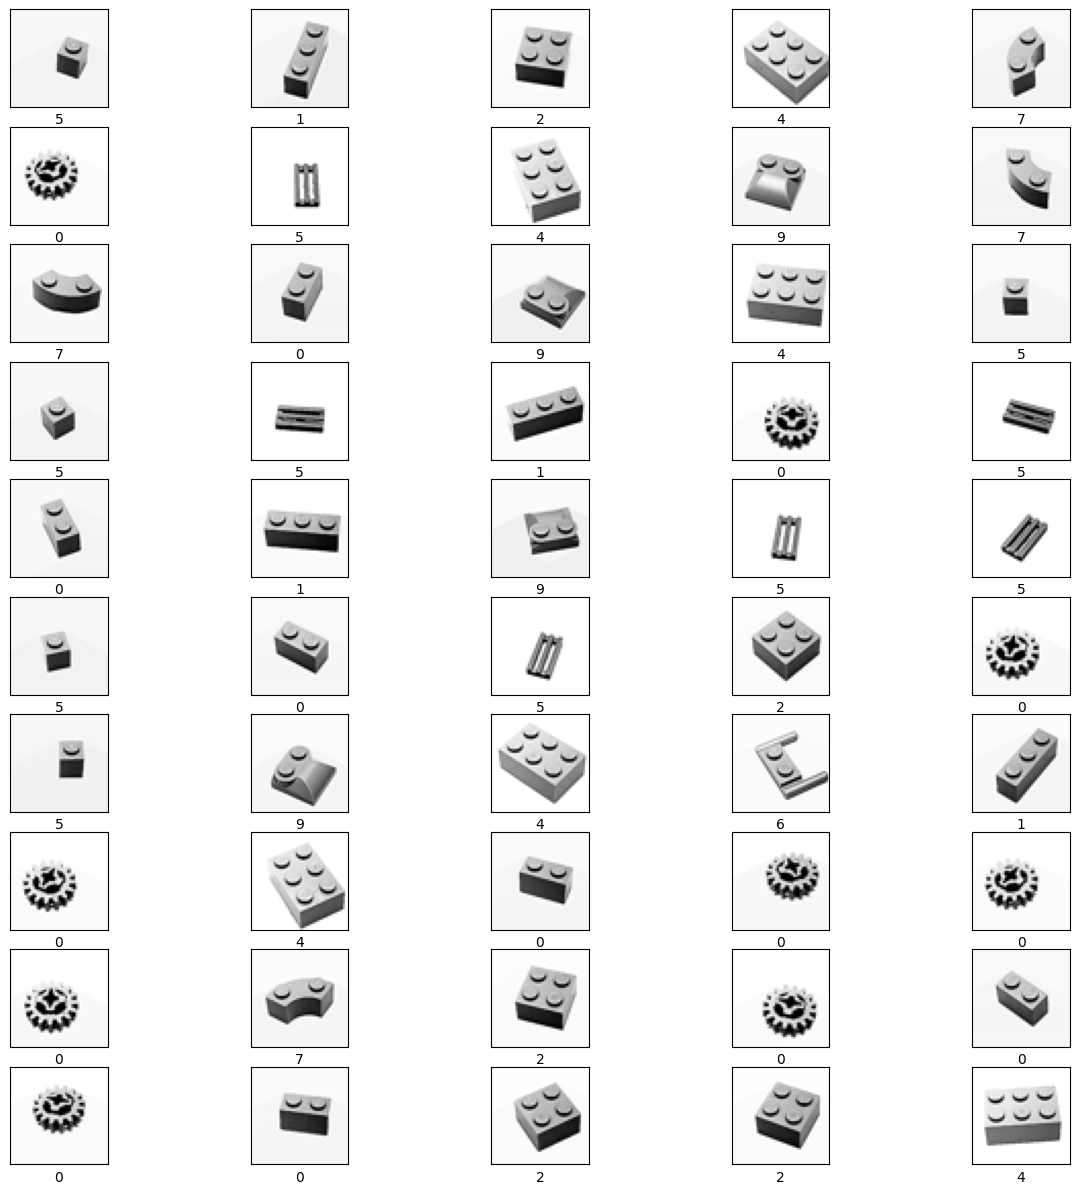

In [28]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
for i in range(50):
    images_data, label_data = train_data[i]
    plt.subplot(10,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(images_data, cmap=plt.cm.binary)
    plt.xlabel(labels[label_data])
plt.show()

In [29]:
import pickle
import numpy as np
import tensorflow as tf

# Загрузка данных из файлов pickle
with open('lego-train.pickle', 'rb') as file:
    train_data = pickle.load(file)

with open('lego-test.pickle', 'rb') as file:
    test_data = pickle.load(file)

# Извлечение изображений и меток
train_data_X, train_data_y = zip(*train_data)
test_data_X, test_data_y = zip(*test_data)

# Преобразование списков изображений в массивы NumPy
X_train = np.array(train_data_X)
X_test = np.array(test_data_X)

# Преобразование меток в формат one-hot encoding
y_train = tf.keras.utils.to_categorical(train_data_y, num_classes=10)
y_test = tf.keras.utils.to_categorical(test_data_y, num_classes=10)

## LeNet

In [30]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Определение модели LeNet-5
model = models.Sequential()
model.add(layers.Conv2D(6, (5, 5), activation='relu', input_shape=(48, 48, 1)))  # Измените размер входа на 32x32x1
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(16, (5, 5), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(120, activation='relu'))
model.add(layers.Dense(84, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))  # 10 - количество классов

# Компилирование модели
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Вывод структуры модели
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 44, 44, 6)         156       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 22, 22, 6)         0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 18, 18, 16)        2416      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 9, 9, 16)          0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 1296)              0         
                                                                 
 dense_5 (Dense)             (None, 120)              

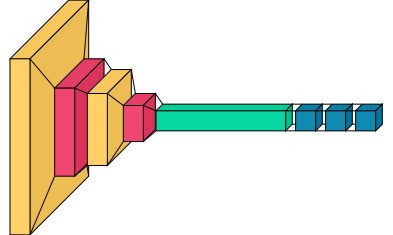

In [31]:
import visualkeras
visualkeras.layered_view(model)

In [32]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
15/15 [==============================] - 4s 36ms/step - loss: 8.6618 - accuracy: 0.2262 - val_loss: 1.8092 - val_accuracy: 0.4133
Epoch 2/10
15/15 [==============================] - 0s 24ms/step - loss: 1.1893 - accuracy: 0.5809 - val_loss: 0.6512 - val_accuracy: 0.7667
Epoch 3/10
15/15 [==============================] - 0s 22ms/step - loss: 0.4981 - accuracy: 0.8182 - val_loss: 0.2176 - val_accuracy: 0.9533
Epoch 4/10
15/15 [==============================] - 0s 24ms/step - loss: 0.1691 - accuracy: 0.9512 - val_loss: 0.0582 - val_accuracy: 0.9933
Epoch 5/10
15/15 [==============================] - 0s 22ms/step - loss: 0.0543 - accuracy: 0.9889 - val_loss: 0.0256 - val_accuracy: 1.0000
Epoch 6/10
15/15 [==============================] - 0s 25ms/step - loss: 0.0238 - accuracy: 1.0000 - val_loss: 0.0087 - val_accuracy: 1.0000
Epoch 7/10
15/15 [==============================] - 0s 27ms/step - loss: 0.0135 - accuracy: 1.0000 - val_loss: 0.0047 - val_accuracy: 1.0000
Epoch 8/10
15

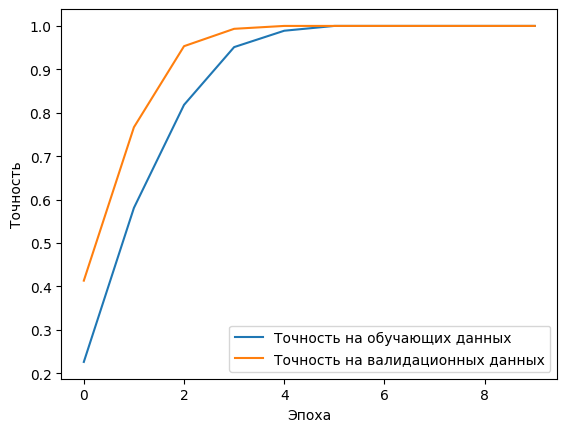

In [33]:
import matplotlib.pyplot as plt

# Визуализация точности
plt.plot(history.history['accuracy'], label='Точность на обучающих данных')
plt.plot(history.history['val_accuracy'], label='Точность на валидационных данных')
plt.xlabel('Эпоха')
plt.ylabel('Точность')
plt.legend()
plt.show()


## My model

In [34]:

from tensorflow.keras import layers, models

num_classes = 10
# Создаем сверточную нейронную сеть
model = models.Sequential()

# Слой входных данных
model.add(layers.Input(shape=(48, 48, 1)))

# Сверточные слои
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

# Расплющивание данных перед полносвязанными слоями
model.add(layers.Flatten())

# Полносвязанные слои
model.add(layers.Dense(256, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))  # Слой отсева

model.add(layers.Dense(128, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))  # Слой отсева

# Выходной слой
model.add(layers.Dense(num_classes, activation='softmax'))  # num_classes - количество классов

# Компилируем модель
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Выводим структуру модели
model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 48, 48, 32)        320       
                                                                 
 batch_normalization_8 (Bat  (None, 48, 48, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 24, 24, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 batch_normalization_9 (Bat  (None, 24, 24, 64)        256       
 chNormalization)                                                
                                                      

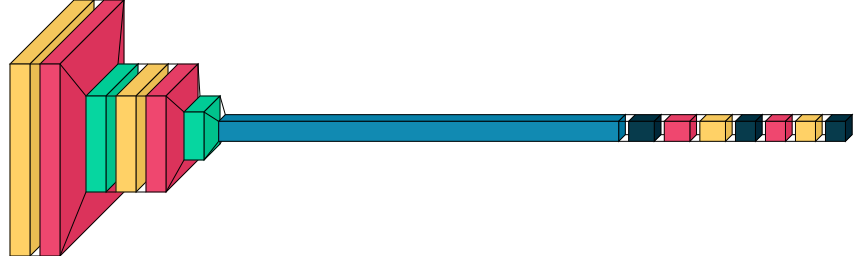

In [35]:
import visualkeras
visualkeras.layered_view(model)

In [36]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
15/15 [==============================] - 8s 117ms/step - loss: 2.0197 - accuracy: 0.3703 - val_loss: 22.4242 - val_accuracy: 0.1933
Epoch 2/10
15/15 [==============================] - 1s 85ms/step - loss: 1.0127 - accuracy: 0.6585 - val_loss: 18.8131 - val_accuracy: 0.1200
Epoch 3/10
15/15 [==============================] - 1s 89ms/step - loss: 0.6184 - accuracy: 0.7894 - val_loss: 10.3795 - val_accuracy: 0.2133
Epoch 4/10
15/15 [==============================] - 1s 82ms/step - loss: 0.5290 - accuracy: 0.8271 - val_loss: 6.2979 - val_accuracy: 0.2667
Epoch 5/10
15/15 [==============================] - 1s 82ms/step - loss: 0.5037 - accuracy: 0.8337 - val_loss: 3.3477 - val_accuracy: 0.3333
Epoch 6/10
15/15 [==============================] - 1s 84ms/step - loss: 0.3963 - accuracy: 0.8825 - val_loss: 1.3076 - val_accuracy: 0.5867
Epoch 7/10
15/15 [==============================] - 1s 88ms/step - loss: 0.3683 - accuracy: 0.8891 - val_loss: 0.7284 - val_accuracy: 0.7200
Epoch 8/1

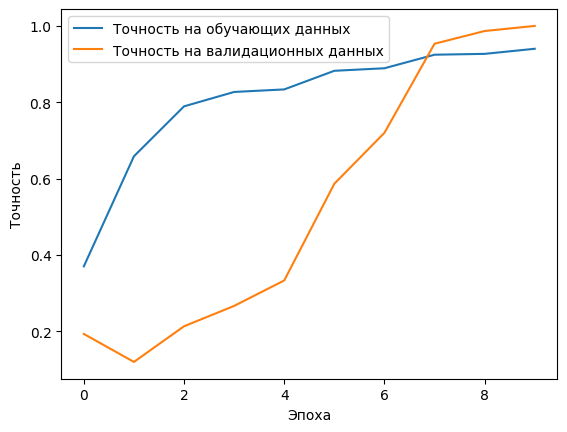

In [37]:

import matplotlib.pyplot as plt

# Визуализация точности
plt.plot(history.history['accuracy'], label='Точность на обучающих данных')
plt.plot(history.history['val_accuracy'], label='Точность на валидационных данных')
plt.xlabel('Эпоха')
plt.ylabel('Точность')
plt.legend()
plt.show()